# Train model

1. Activate your virtual environment on Anaconda prompt and change directory to your darknet directory. 
2. Train your model by typing: 

```
darknet.exe detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolov4.conv.137
```

# Test model

1. Test your model by typing:

```
darknet.exe detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/backup/yolo-obj_6000.weights -ext_output -dont_show -out val_result.json < build/darknet/x64/data/val.txt
```

The output is a json file with the image names and predicted bounding box. It is recommended to train for 2000 iterations * n number of classes. I stopped the training at 6000 iterations since the loss did not go down significantly in the last 1000 iterations.

## Visualize predictions

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

PATH = "darknet"
os.chdir(PATH)

In [2]:
with open('val_result.json', 'r') as f:
    sub = json.load(f)

In [3]:
from PIL import Image
l = []
PATH = "C:/Users/weich/Downloads/SMU2020/DSTATIL/darknet"
for i in range(len(sub)):
    imgid = sub[i]["filename"].split("/")[-1][:-4]
    im = Image.open(PATH + '/' + sub[i]["filename"])
    width, height = im.size
    objects = sub[i]["objects"]
    for o in objects:
        cat_id = o["class_id"] + 1
        xmin = round((o["relative_coordinates"]["center_x"] - o["relative_coordinates"]["width"]/2) * width, 6)
        ymin = round((o["relative_coordinates"]["center_y"] - o["relative_coordinates"]["height"]/2) * height, 6)
        w = o["relative_coordinates"]["width"] * width
        h = o["relative_coordinates"]["height"] * height
        score = o["confidence"]
        l.append({"image_id": imgid, "category_id":cat_id, "bbox": [xmin, ymin, w, h], "score": score})
len(l)

4

In [4]:
l

[{'image_id': 'test_image',
  'category_id': 3,
  'bbox': [3174.954048, 593.574912, 876.145536, 1340.533152],
  'score': 0.997721},
 {'image_id': 'test_image',
  'category_id': 2,
  'bbox': [3441.094272, 2615.642064, 233.565696, 337.925952],
  'score': 0.970429},
 {'image_id': 'test_image',
  'category_id': 1,
  'bbox': [5.570208, 1611.642312, 479.38464, 924.082992],
  'score': 0.997439},
 {'image_id': 'test_image',
  'category_id': 1,
  'bbox': [14.194656, 91.367136, 679.912128, 1763.433504],
  'score': 0.998574}]

In [19]:
from pandas import DataFrame
pred = DataFrame(l)
pred

,image_id,category_id,bbox,score
0,test_image,3,"[3174.954048, 593.574912, 876.145536, 1340.533...",0.997721
1,test_image,2,"[3441.094272, 2615.642064, 233.565696, 337.925...",0.970429
2,test_image,1,"[5.570208, 1611.642312, 479.38464, 924.082992]",0.997439
3,test_image,1,"[14.194656, 91.367136, 679.912128, 1763.433504]",0.998574


In [20]:
import pandas as pd
pred["file_name"] = pred['image_id'].astype(str) + ".png"
pred[["xmin", "ymin", "w", "h"]] = pd.DataFrame(pred.bbox.tolist(), index=pred.index)
pred = pred.drop(columns=["bbox"])
pred

,image_id,category_id,score,file_name,xmin,ymin,w,h
0,test_image,3,0.997721,test_image.png,3174.954048,593.574912,876.145536,1340.533152
1,test_image,2,0.970429,test_image.png,3441.094272,2615.642064,233.565696,337.925952
2,test_image,1,0.997439,test_image.png,5.570208,1611.642312,479.384640,924.082992
3,test_image,1,0.998574,test_image.png,14.194656,91.367136,679.912128,1763.433504


In [22]:
categories = ["yellow_big", "yellow_small", "red", "stone"]

In [23]:
path = 'C:/Users/weich/Downloads/SMU2020/DSTATIL/darknet/build/darknet/x64/data/obj'

def visualisesub(image, categories, pred):    
#     print(image)
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0, 0, 1, 1])
    # read and plot the image
    pimage = plt.imread(os.path.join(path, image))
    plt.title(image)
    plt.imshow(pimage)
    # iterating over the image for different objects
    for _,row in pred[pred.file_name == image].iterrows():
        xmin = row.xmin
#         print("xmin: ", xmin)
        xmax = row.xmin + row.w
#         print("xmax: ", xmax)
        ymin = row.ymin
#         print("ymin: ", ymin)
        ymax = row.ymin + row.h
#         print("ymax: ", ymax)

        width = row.w
        height = row.h

    # assign different color to different classes of objects
        if row.category_id ==  1:
            edgecolor = "red"
            ax.annotate(categories[0], xy=(xmax-40,ymin+20))
        elif row.category_id == 2:
            edgecolor = "blue"
            ax.annotate(categories[1], xy=(xmax-40,ymin+20))
        elif row.category_id == 3:
            edgecolor = "green"
            ax.annotate(categories[2], xy=(xmax-40,ymin+20))
        elif row.category_id == 4:
            edgecolor = "yellow"
            ax.annotate(categories[3], xy=(xmax-40,ymin+20))

    # add bounding boxes to the image
        rect = mpatches.Rectangle((xmin,ymin), 
                             width, height, 
                             edgecolor = edgecolor, 
                             facecolor = 'none')
        ax.add_patch(rect)
    plt.show(block=False)

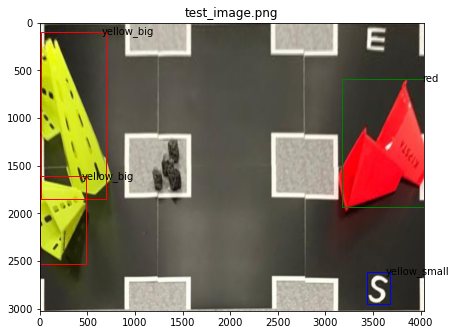

In [24]:
visualisesub('test_image.png', categories, pred)

This test image with the closest resemblance to the training dataset could accurately predict some obstacles, such as the big yellow and red cones. However, it could not predict the stones, and inaccurately predict the letter S as a stone.

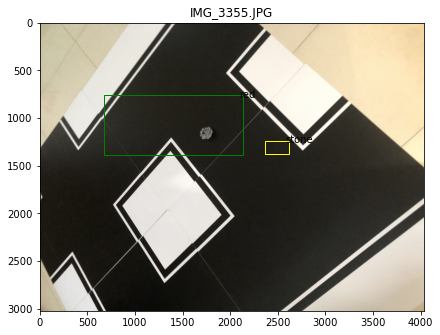

In [23]:
visualisesub('IMG_3355.JPG', categories, pred)

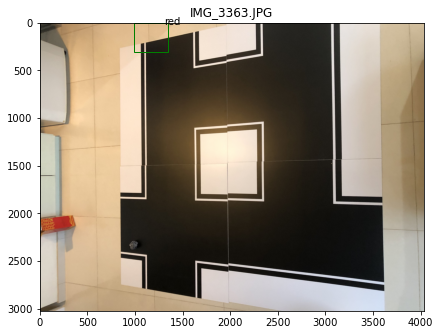

In [25]:
visualisesub('IMG_3363.JPG', categories, pred)

The model does not seem to be able to do well on images with stones and no cones.